In [1]:
#import packages
import pandas as pd
import numpy as np

In [2]:
#load dataset
df = pd.read_csv('Anomalies1.csv')

In [3]:
#set params
params = list(df.columns)

print(params)

['Country Name', "Men's FIFA Ranking Points", "Women's FIFA Ranking Points", 'Percentage Difference', 'Population', 'HDI', 'GDP per Capita ($)', 'Gender Inequality Index']


In [4]:
#remove Country Name from params
params = params[1:]

print(params)

["Men's FIFA Ranking Points", "Women's FIFA Ranking Points", 'Percentage Difference', 'Population', 'HDI', 'GDP per Capita ($)', 'Gender Inequality Index']


In [5]:
#isolate specific country
Country = df.loc[df['Country Name']== 'Mauritius'].reset_index()

Country = list(Country.loc[0])
Country = Country[2: ]

In [6]:
#check data
print(Country)

[932.02, 363.36, 61.01371215, 1266060, 0.802, 20528.83365, 0.347]


In [7]:
#check length of params
print(len(params)),(len(Country))

7


(None, 7)

In [8]:
#check params
print(params)

["Men's FIFA Ranking Points", "Women's FIFA Ranking Points", 'Percentage Difference', 'Population', 'HDI', 'GDP per Capita ($)', 'Gender Inequality Index']


In [9]:
#import maths package
from scipy import stats 
import math

In [10]:
#calculate percentile ranks for specific country within dataset
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],Country[x])))

In [11]:
#check values
print(values)

[6, 0, 100, 12, 64, 65, 48]


In [12]:
#import mplsoccer package for vizualisation
from mplsoccer import PyPizza, add_image, FontManager

Text(0.515, 0.942, 'Percentile Rank in various indicators')

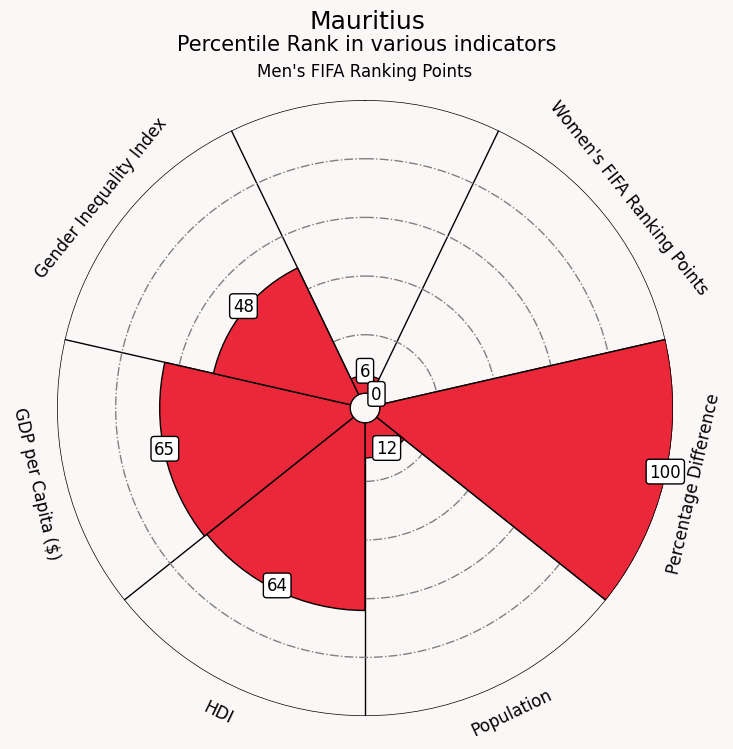

In [13]:
#load mpl soccer specification
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color= '#fcf7f7',
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=1,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#EA2839", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
         va="center"
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="black", fontsize=12,
         zorder=3,
        bbox=dict(
            edgecolor="black", facecolor="white",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Mauritius", size=18,
    ha="center" , color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.942,
    "Percentile Rank in various indicators",
    size=15,
    ha="center", color="#000000"
)

In [14]:
#save as image
fig.savefig('MauritiusPizzaChart.png', dpi = 1000)